In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
reuters = tf.keras.datasets.reuters

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    
    return results

In [5]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
y_train = to_one_hot(train_labels)
y_test  = to_one_hot(test_labels)

In [8]:
models = tf.keras.models
layers = tf.keras.layers

In [9]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [10]:
optimizers = tf.keras.optimizers
losses = tf.keras.losses
metrics = tf.keras.metrics

In [11]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss = losses.categorical_crossentropy,
             metrics=[metrics.categorical_accuracy])

In [12]:
xval=x_train[:1000]
partial_x_train = x_train[1000:]
yval=y_train[:1000]
partial_y_train=y_train[1000:]

In [13]:
history=model.fit(partial_x_train, 
                  partial_y_train, 
                  epochs=8, 
                  batch_size=512, 
                  validation_data=(xval, yval))

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 5s 619us/step - loss: 2.1164 - categorical_accuracy: 0.5616 - val_loss: 1.3498 - val_categorical_accuracy: 0.6970
Epoch 2/8
7982/7982 [==============================] - 4s 488us/step - loss: 1.0991 - categorical_accuracy: 0.7633 - val_loss: 1.1335 - val_categorical_accuracy: 0.7280
Epoch 3/8
7982/7982 [==============================] - 4s 509us/step - loss: 0.7722 - categorical_accuracy: 0.8359 - val_loss: 0.9899 - val_categorical_accuracy: 0.7990
Epoch 4/8
7982/7982 [==============================] - 3s 396us/step - loss: 0.5714 - categorical_accuracy: 0.8791 - val_loss: 0.9076 - val_categorical_accuracy: 0.8100
Epoch 5/8
7982/7982 [==============================] - 3s 380us/step - loss: 0.4120 - categorical_accuracy: 0.9143 - val_loss: 0.8751 - val_categorical_accuracy: 0.8170
Epoch 6/8
7982/7982 [==============================] - 3s 393us/step - loss: 0.3269 - categorical_accuracy:

In [14]:
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['categorical_accuracy']
loss_value = history_dict['loss']
val_loss_value = history_dict['val_loss']
val_acc = history_dict['val_categorical_accuracy']
epochs = range(1, len(acc) + 1)

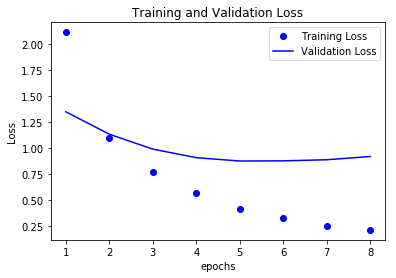

In [15]:
plt.plot(epochs, loss_value, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_value, 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

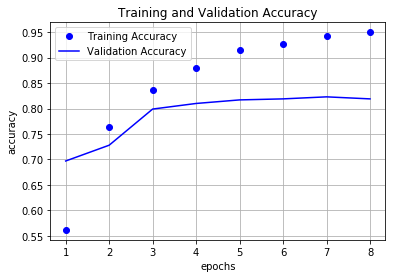

In [16]:
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy") 
plt.grid()
plt.legend()
plt.show()

In [17]:
results = model.evaluate(x_test, y_test)
results

2246/2246 [==============================] - 1s 258us/step


[0.9907751130081136, 0.7929652715939448]

In [18]:
predictions = model.predict(x_test)

In [19]:
checkDataFor = 105
print(np.argmax(predictions[checkDataFor]), test_labels[checkDataFor])

2 2


In [20]:
len(test_labels)

2246

In [21]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) 
                           for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') 
                             for i in train_data[0]])

In [22]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [23]:
test_labels

array([ 3, 10,  1, ...,  3,  3, 24])

In [24]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])